In [1]:
import pandas as pd
import numpy as np
import re
from vncorenlp import VnCoreNLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Khởi tạo VnCoreNLP
vncorenlp=VnCoreNLP("C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/NLP-main/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

# Từ điển viết tắt tiếng Việt
abbreviation_map = {
    "ko": "không",
    "hok": "không",
    "đc": "được",
    "ms": "mới",
    "j": "gì",
    "vl": "vãi lồn",
    "cmt": "comment",
    "đụ": "địt",
    "đmm": "địt mẹ mày",
    "dm": "địt mẹ",
    "đcm": "địt con mẹ",
    "cc": "con cặc",
    "nx": "nữa",
    "tks": "thanks",
    "r": "rồi",
    "fb": "facebook",
    "ey": "ơi",
    "ntn": "như thế nào",
    "uii": "ơi",
    "k": "không",
    "van hoa": "văn hóa",
    "qá": "quá",
    "ngỉ": "nghỉ",
    "đc": "được",
    "t": "tao",
    "m": "mày",
    "ib": "nhắn tin",
    "đt": "điện thoại",
    "mng": "mọi người",
    "mat dai": "mất dạy",
    "vs": "với",
    "vc": "vãi cứt",
    "vcl": "vãi cả lồn",
    "đ": "đéo",
    "Du me may": "Địt mẹ mày",
    "Đkm": "Địt con mẹ",
    "Đậu móa": "Địt mẹ",
    "ưii": "ơi",
    "XL": "xin lỗi",
    "xloi": "xin lỗi",
    "quanque": "quần què",
    "vch": "vãi chưởng",
    "D m": "Địt mẹ",
    "lày": "này",
    "xamlol": "xàm lồn",
    "vler": "vãi lồn",
    "Ĩ": "Đĩ",
    "thèng": "thằng",
    "đ ịt": "địt",
    "du me": "địt mẹ",
    "xạo lol": "xạo lồn",
    # Thêm các từ khác nếu cần
}

In [6]:
# Hàm mở rộng viết tắt
def expand_abbreviations(text):
    words = text.split()
    words = [abbreviation_map.get(word.lower(), word) for word in words]
    return ' '.join(words)

In [12]:
# Hàm tiền xử lý văn bản
def preprocess_text(text):
    # Chuyển về chữ thường
    text = text.lower()
    # Loại bỏ ký tự đặc biệt
    text = re.sub(r"[^\w\s]", "", text)
    # Mở rộng viết tắt
    text = expand_abbreviations(text)
    # Tách từ bằng VnCoreNLP
    tokens = vncorenlp.tokenize(text)
    if tokens and tokens[0]:  # Kiểm tra nếu token không rỗng
        text = " ".join(tokens[0])
    else:
        text = ""  # Nếu không có token, trả về chuỗi rỗng
    return text


In [13]:
# 1. Đọc dữ liệu
data = pd.read_csv('C:/Users/Admin/Documents/XU LY NGON NGU TU NHIEN HUST/NLP-main/crawler_facebook_comment-master/data/data2.csv')  # File data.csv chứa 2 cột: 'Description' và 'label'
print("Dữ liệu ban đầu:\n", data.head())

Dữ liệu ban đầu:
                                          Description      Label
0                                        Dừa lắm :))  non-toxic
1                                    Bấp bênh vl thế      toxic
2  Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...      toxic
3  Thấy chán ad page này kiến thức thì nông cản c...      toxic
4       Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa  non-toxic


In [14]:
# 2. Tiền xử lý dữ liệu
data['cleaned_description'] = data['Description'].apply(preprocess_text)
print("Dữ liệu sau tiền xử lý:\n", data.head())

Dữ liệu sau tiền xử lý:
                                          Description      Label  \
0                                        Dừa lắm :))  non-toxic   
1                                    Bấp bênh vl thế      toxic   
2  Chắc cũng biết ko tồn tại đc bao lâu nữa nên c...      toxic   
3  Thấy chán ad page này kiến thức thì nông cản c...      toxic   
4       Giang Giang Đỗ Thị Ngọc Hà trend mới kìa kìa  non-toxic   

                                 cleaned_description  
0                                            dừa lắm  
1                                    bấp_bênh vl thế  
2  chắc cũng biết không tồn_tại được bao_lâu nữa ...  
3  thấy chán ad page này kiến_thức thì nông cản c...  
4       giang giang đỗ thị ngọc hà trend mới kìa kìa  


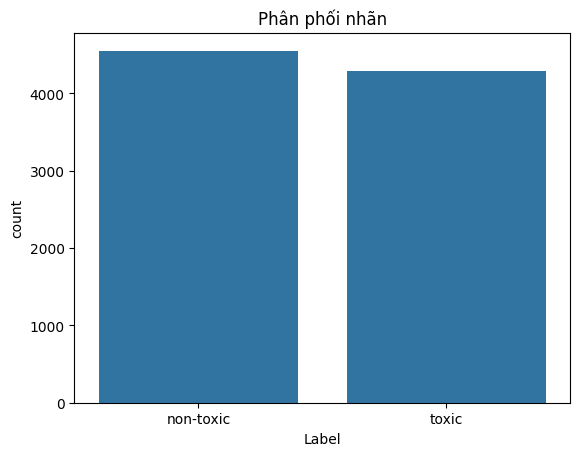

In [ ]:
sns.countplot(x='Label', data=data)
plt.title("Phân phối nhãn")
plt.show()

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(data['cleaned_description']).toarray()
y = data['Label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8417184850197852
Classification Report:
               precision    recall  f1-score   support

   non-toxic       0.81      0.91      0.86       921
       toxic       0.88      0.77      0.82       848

    accuracy                           0.84      1769
   macro avg       0.85      0.84      0.84      1769
weighted avg       0.85      0.84      0.84      1769



In [24]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_description'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_description'])
X_padded = pad_sequences(X_seq, maxlen=100)
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [26]:
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [31]:
# Giả sử nhãn của bạn là 'toxic' và 'non-toxic', bạn có thể thay thế chúng bằng 1 và 0
y_train_seq = y_train_seq.map({'toxic': 1, 'non-toxic': 0})
y_test_seq = y_test_seq.map({'toxic': 1, 'non-toxic': 0})

# Kiểm tra lại kiểu dữ liệu và giá trị của y_train_seq, y_test_seq
print(y_train_seq.head())
print(y_train_seq.dtype)


4939    1
7654    0
1359    1
8070    0
1157    0
Name: Label, dtype: int64
int64


In [32]:
print(X_train_seq.dtype)
print(X_test_seq.dtype)
print(y_train_seq.dtype)
print(y_test_seq.dtype)

int32
int32
int64
int64


In [33]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = lstm_model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test_seq))

Epoch 1/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7245 - loss: 0.5527 - val_accuracy: 0.8570 - val_loss: 0.3342
Epoch 2/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9143 - loss: 0.2223 - val_accuracy: 0.8615 - val_loss: 0.3584
Epoch 3/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9506 - loss: 0.1439 - val_accuracy: 0.8598 - val_loss: 0.4029
Epoch 4/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9632 - loss: 0.1120 - val_accuracy: 0.8604 - val_loss: 0.4324
Epoch 5/5
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9731 - loss: 0.0777 - val_accuracy: 0.8513 - val_loss: 0.5297


In [34]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test_seq)
print("LSTM Model Accuracy:", lstm_accuracy)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8443 - loss: 0.5465
LSTM Model Accuracy: 0.851328432559967


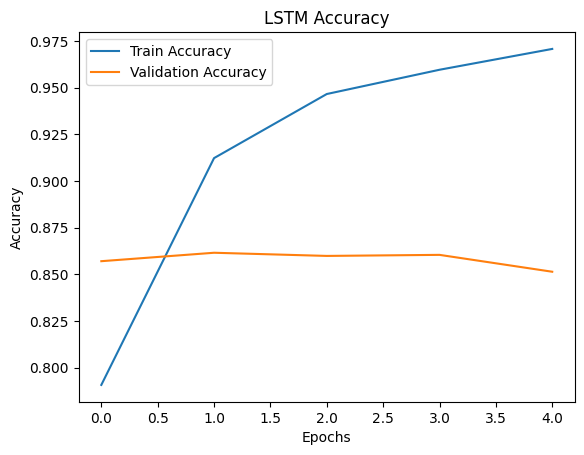

In [35]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
# Ví dụ câu mới để kiểm tra
new_text = "yêu con chó này ghê"

# Tiền xử lý câu mới
new_text_cleaned = preprocess_text(new_text)

# Chuyển câu thành chuỗi chỉ số
new_text_seq = tokenizer.texts_to_sequences([new_text_cleaned])
new_text_padded = pad_sequences(new_text_seq, maxlen=100)

# Dự đoán
prediction = lstm_model.predict(new_text_padded)
prediction_label = (prediction > 0.5).astype(int)

print(f"Prediction: {prediction_label[0][0]}")  # In ra 0 hoặc 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: 1
